In [310]:
import numpy as np
import random
import pandas as pd
import matplotlib.pylab as plt

Data Extraction

In [311]:
# csv_file_path=input("Enter path of csv file")
csv_file_path="data.csv"
data =pd.read_csv(csv_file_path)

we divide the data into 80:20
<br>
80 is training data
<br>
20 is test data

In [312]:
rows=data.shape[0]
training_examples=int(0.8*rows)
test_examples=rows-training_examples
print(rows,training_examples,test_examples)

5 4 1


In [313]:
training_examples=rows

In [314]:
# X_train=data.iloc[0:training_examples,0:1] #Dataframe
# Y_train=data.iloc[0:training_examples,1:2] #Dataframe
X_train=data.iloc[0:training_examples,0] #Series
Y_train=data.iloc[0:training_examples,1] #Series


X_test=data.iloc[training_examples:,0]
Y_test=data.iloc[training_examples:,1]


# X_train_np=np.array(X_train.iloc[:,0]) # to be used with X_train=data.iloc[0:training_examples,0:1]
X_train_np=np.array(X_train.iloc[:]) # to be used with X_train=data.iloc[0:training_examples,0]
Y_train_np=np.array(Y_train.iloc[:])

In [315]:
def compute_gradient(X,Y,w,b):
    predicted = w * X + b
    error = predicted - Y
    return error*X, error


def cost_Fn(X,Y, w,b):
    ans=int(0)
    for i in range(len(X)):
        ans+=int((w*X[i]+b-Y[i]))**2
    ans/=(2*len(X))
    return ans




In [316]:
def Stochastic_gradient_descent(x, y, w, b, alpha, num_iters,cost_function, gradient_function):

    J_history = []
    p_history = []

    for j in range(num_iters):
      for i in range(x.shape[0]):
          # Calculate the gradient and update the parameters using gradient_function
          dj_dw, dj_db = gradient_function(x[i], y[i], w , b)
          print(dj_dw, dj_db)
          # Update Parameters using equation (3) above
          b = b - alpha * dj_db
          w = w - alpha * dj_dw
          print(w, b)
          plt.scatter(x,y)
          plt.scatter(x,(w*x)+b)
          plt.show()
          if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
      print('-')
    return w, b, J_history, p_history #return w and J,w history for graphing

41.54 6.699999999999999
4.5846 1.933


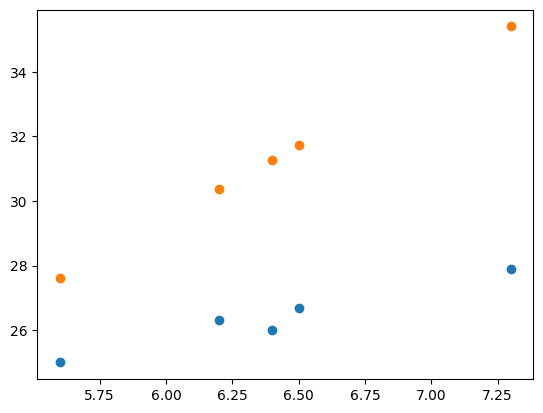

32.71385000000001 5.0329000000000015
4.2574615 1.882671


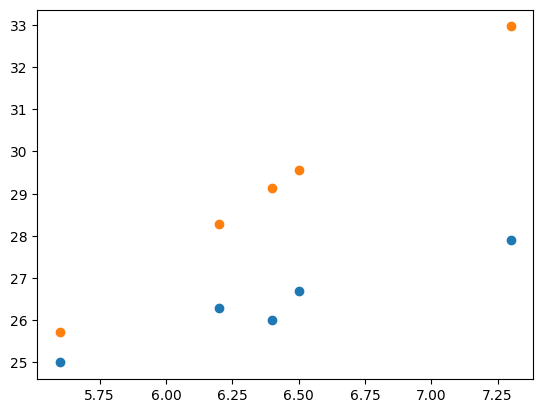

4.05695023999998 0.7244553999999965
4.2168919976 1.875426446


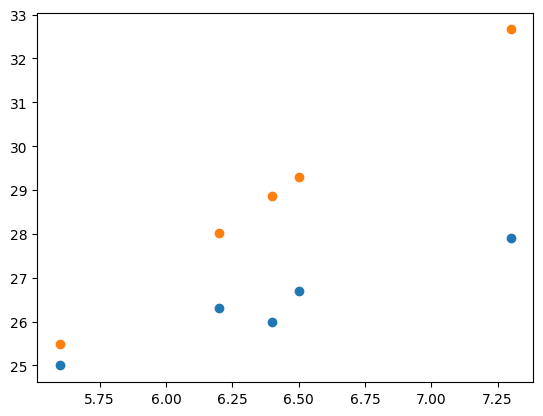

18.326625476096023 2.8635352306400037
4.03362574283904 1.8467910936936


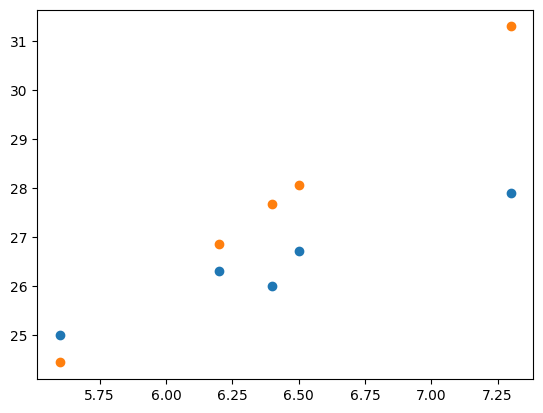

24.763490819855722 3.392259016418592
3.7859908346404825 1.812868503529414


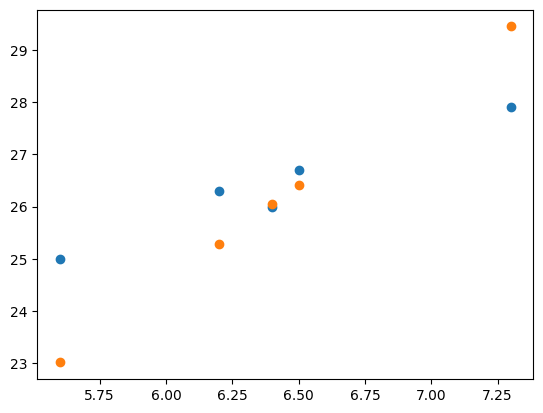

-
-6.286727594537474 -1.0139883216995926
3.8488581105858573 1.82300838674641


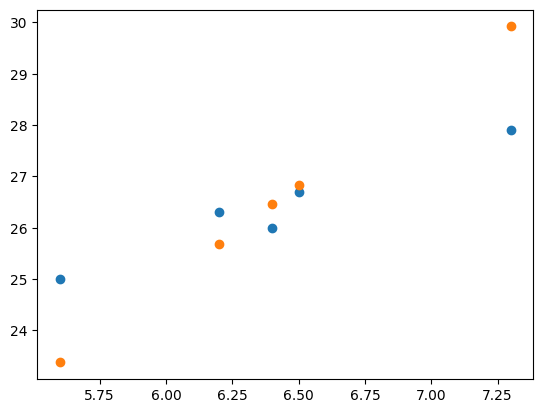

0.9138096861041412 0.14058610555448325
3.8397200137248158 1.8216025256908652


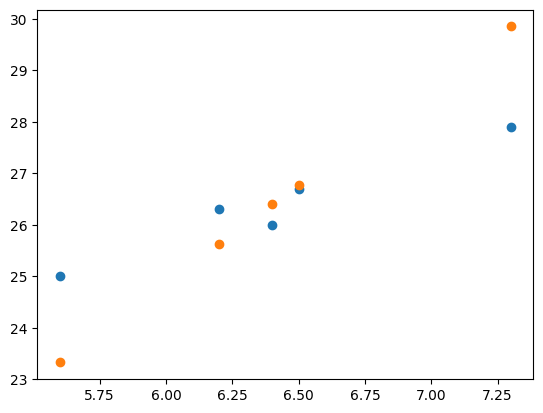

-9.385406225720953 -1.6759653974501703
3.9335740759820252 1.8383621796653669


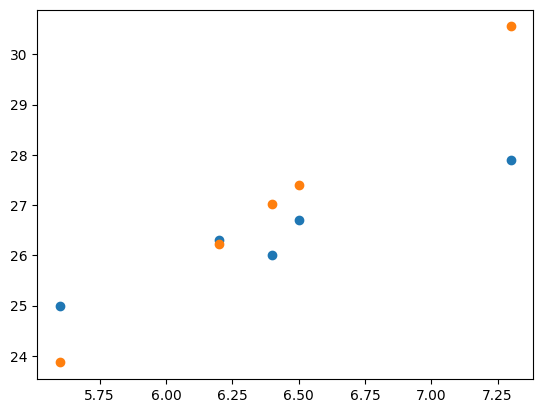

6.484712102082108 1.0132362659503293
3.868726954961204 1.8282298170058635


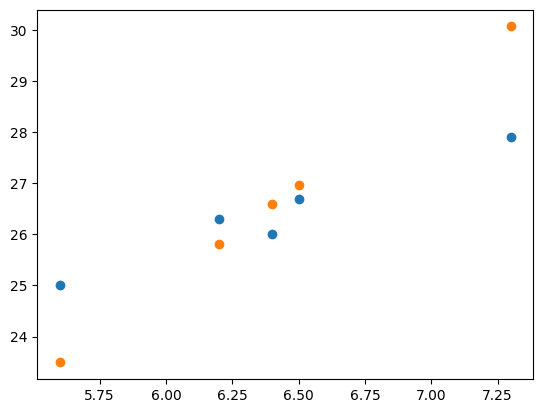

15.84053709402535 2.169936588222651
3.7103215840209507 1.806530451123637


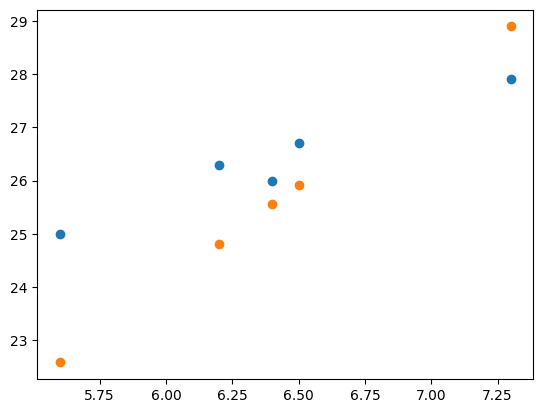

-


In [317]:
w_init = 5
b_init = 2
# some gradient descent settings
iterations = 2
tmp_alpha = 0.01
# run gradient descent
w_final, b_final, J_hist, p_hist = Stochastic_gradient_descent(X_train_np ,Y_train_np, w_init, b_init, tmp_alpha,iterations, cost_Fn, compute_gradient)

In [318]:
print(w_final)
print(b_final)


3.7103215840209507
1.806530451123637


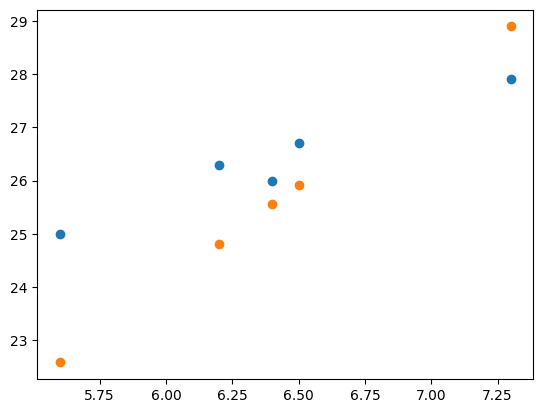

In [319]:
plt.scatter(X_train,Y_train)
plt.scatter(X_train,(w_final*X_train)+b_final)

In [320]:
J_hist

[11.9, 3.9, 2.5, 1.1, 0.3, 0.5, 0.2, 0.6, 0.5, 0.5]